In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

Найдем и удалим ненужные столбцы

In [ ]:
df = pd.read_csv("clinical_data_TCGA_PRAD.csv")

na_only_columns = df.columns[df.isna().all()]

print("Столбцы, содержащие только NA и могут быть удалены:")
print(list(na_only_columns))
print(len(na_only_columns))

df_cleaned = df.drop(columns=na_only_columns)

df_cleaned.to_csv("cleaned_clinical_data_TCGA_PRAD.csv", index=False)

Столбцы, содержащие только NA и могут быть удалены:
['created_datetime', 'last_known_disease_status', 'days_to_last_known_disease_status', 'days_to_recurrence', 'tumor_grade', 'progression_or_recurrence', 'tumor_of_origin', 'ajcc_pathologic_stage', 'ajcc_pathologic_m', 'ajcc_staging_system_edition', 'year_of_birth', 'year_of_death', 'treatments_pharmaceutical_clinical_trial_indicator', 'treatments_pharmaceutical_days_to_treatment_start', 'treatments_pharmaceutical_therapeutic_agents', 'treatments_pharmaceutical_days_to_treatment_end', 'treatments_pharmaceutical_treatment_anatomic_sites', 'treatments_pharmaceutical_treatment_dose', 'treatments_pharmaceutical_number_of_fractions', 'treatments_pharmaceutical_treatment_dose_units', 'treatments_pharmaceutical_prescribed_dose_units', 'treatments_pharmaceutical_route_of_administration', 'treatments_pharmaceutical_number_of_cycles', 'treatments_pharmaceutical_prescribed_dose', 'treatments_pharmaceutical_course_number', 'treatments_radiation_cl

Удалим пустые или дублирующие столбцы

In [ ]:
# Список нужных столбцов
columns_to_keep = [
    "submitter_id",
    "age_at_diagnosis",
    "primary_diagnosis",
    "gleason_grade_tertiary",
    "secondary_gleason_grade",
    "primary_gleason_grade",
    "ajcc_pathologic_t",
    "gleason_score",
    "morphology",
    "ajcc_pathologic_n",
    "ajcc_clinical_t",
    "residual_disease",
    "race",
    "vital_status",
    "age_at_index",
    "days_to_last_follow_up",
    "follow_ups_disease_response"
]

# Оставляем только эти столбцы
columns_available = [col for col in columns_to_keep if col in df.columns]

df_filtered = df[columns_available]

# Сохраняем в новый CSV
df_filtered.to_csv("filtered_clinical_data.csv", index=False)

In [ ]:
are_equal = (df["submitter_id"] == df["bcr_patient_barcode"])

# Проверяем, все ли значения совпадают
if are_equal.all():
    print("✅ Все значения в столбцах совпадают")
else:
    print("❌ Есть различия между столбцами")

    print(df.loc[~are_equal, ["submitter_id", "bcr_patient_barcode"]])

✅ Все значения в столбцах совпадают


In [9]:
df = pd.read_csv("filtered_clinical_data.csv")
df = df.drop(columns=["gleason_grade_tertiary", "secondary_gleason_grade", "primary_gleason_grade"])

df.to_csv("cleaned_data.csv")

Функция для извлечения цифр и буквы с учетом 'Unknown' и nan

In [ ]:
def extract_num(val):
    if pd.isna(val) or val == 'Unknown':
        return 0
    else:
        match = re.search(r'\d+', val)
        return int(match.group()) if match else 0

def extract_letter(val):
    if pd.isna(val) or val == 'Unknown':
        return 0
    else:
        match = re.search(r'[a-z]', val)
        return match.group() if match else 0

In [128]:
df = pd.read_csv("cleaned_data.csv")
df.head(10)

,Unnamed: 0,submitter_id,age_at_diagnosis,primary_diagnosis,ajcc_pathologic_t,gleason_score,morphology,ajcc_pathologic_n,ajcc_clinical_t,residual_disease,race,vital_status,age_at_index,days_to_last_follow_up,follow_ups_disease_response
0,0,TCGA-KC-A4BV,24138.0,"Adenocarcinoma, NOS",T3a,9,8140/3,N0,T2,R0,asian,Alive,66,1328,WT-With Tumor
1,1,TCGA-EJ-5525,24535.0,Acinar cell carcinoma,T2c,9,8550/3,N0,T3a,R0,white,Alive,67,1115,WT-With Tumor
2,2,TCGA-2A-AAYU,20582.0,"Adenocarcinoma, NOS",T3a,6,8140/3,N0,T1c,R1,white,Alive,56,615,TF-Tumor Free
3,3,TCGA-HC-8213,17673.0,Acinar cell carcinoma,T2c,6,8550/3,NaN,Unknown,R0,white,Alive,48,589,TF-Tumor Free
4,4,TCGA-EJ-5503,18395.0,Acinar cell carcinoma,T3a,8,8550/3,N0,T2b,R0,white,Alive,50,1391,TF-Tumor Free
5,5,TCGA-VP-A87D,19818.0,"Adenocarcinoma, NOS",T3a,9,8140/3,N1,T1c,R0,white,Alive,54,1853,TF-Tumor Free
6,6,TCGA-HC-8265,24382.0,Acinar cell carcinoma,T3a,8,8550/3,N0,Unknown,R1,white,Alive,66,483,TF-Tumor Free
7,7,TCGA-YL-A8SB,22991.0,"Adenocarcinoma, NOS",T3a,9,8140/3,N0,Unknown,R1,white,Alive,62,1719,WT-With Tumor
8,8,TCGA-VN-A88Q,22087.0,"Adenocarcinoma, NOS",T2c,8,8140/3,N0,T2a,R0,white,Alive,60,1366,TF-Tumor Free
9,9,TCGA-J4-A83M,23624.0,"Adenocarcinoma, NOS",T2c,7,8140/3,N0,T2c,R1,white,Alive,64,543,Unknown


In [ ]:
df_encoded = df.copy()

df_encoded = df_encoded.drop(columns=["Unnamed: 0", "submitter_id"])

# Столбец с цифрой (числом)
# Извлекаем цифры из строки, если nan — заменяем на '0'
df_encoded['ajcc_pathologic_t_num'] = df_encoded['ajcc_pathologic_t'].apply(extract_num)

# Столбец с маленькой буквой (последний символ)
# Для nan подставляем букву '0' (можно поменять при желании)
df_encoded['ajcc_pathologic_t_letter'] = df_encoded['ajcc_pathologic_t'].apply(extract_letter)

# 2. Удаляем исходный столбец
df_encoded = df_encoded.drop(columns=['ajcc_pathologic_t'])

df_encoded['ajcc_clinical_t_num'] = df_encoded['ajcc_clinical_t'].apply(extract_num)
df_encoded['ajcc_clinical_t_letter'] = df_encoded['ajcc_clinical_t'].apply(extract_letter)

# Удаляем старый столбец
df_encoded = df_encoded.drop(columns=['ajcc_clinical_t'])


Преобразуем каждый категориальный признак в числовой

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df_encoded.select_dtypes(include="object").columns

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

df_encoded["Id"] = df["Unnamed: 0"]
df_encoded["submitter_id"] = df["submitter_id"]
df_encoded.to_csv("splited_data.csv")

In [127]:
# print(df_encoded["ajcc_clinical_t_letter"].unique())
df_encoded.head(35)

,age_at_diagnosis,primary_diagnosis,gleason_score,morphology,ajcc_pathologic_n,residual_disease,race,vital_status,age_at_index,days_to_last_follow_up,follow_ups_disease_response,ajcc_pathologic_t_num,ajcc_pathologic_t_letter,ajcc_clinical_t_num,ajcc_clinical_t_letter,Id,submitter_id
0,24138.0,2,9,0,0,0,2,0,66,1328,2,3,1,2,0,0,TCGA-KC-A4BV
1,24535.0,0,9,5,0,0,5,0,67,1115,2,2,3,3,1,1,TCGA-EJ-5525
2,20582.0,2,6,0,0,1,5,0,56,615,0,3,1,1,3,2,TCGA-2A-AAYU
3,17673.0,0,6,5,2,0,5,0,48,589,0,2,3,0,0,3,TCGA-HC-8213
4,18395.0,0,8,5,0,0,5,0,50,1391,0,3,1,2,2,4,TCGA-EJ-5503
5,19818.0,2,9,0,1,0,5,0,54,1853,0,3,1,1,3,5,TCGA-VP-A87D
6,24382.0,0,8,5,0,1,5,0,66,483,0,3,1,0,0,6,TCGA-HC-8265
7,22991.0,2,9,0,0,1,5,0,62,1719,2,3,1,0,0,7,TCGA-YL-A8SB
8,22087.0,2,8,0,0,0,5,0,60,1366,0,2,3,2,1,8,TCGA-VN-A88Q
9,23624.0,2,7,0,0,1,5,0,64,543,1,2,3,2,3,9,TCGA-J4-A83M


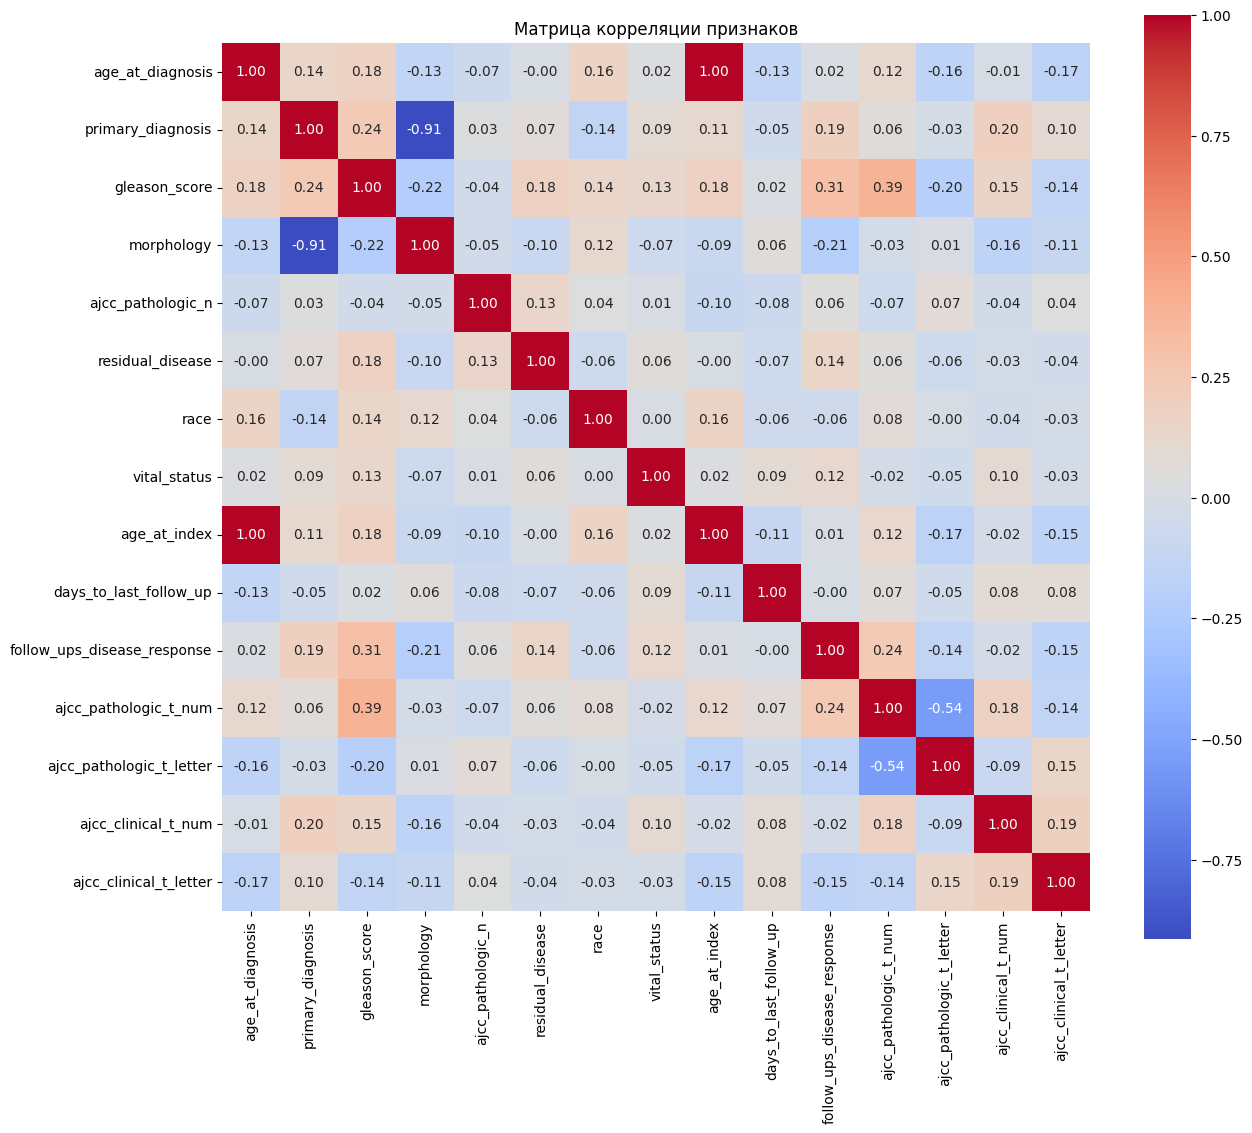

In [113]:
# Вычисляем матрицу корреляций
corr_matrix = df_encoded.corr()

# Визуализируем
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Матрица корреляции признаков")
plt.show()

In [117]:
big_df = pd.read_csv("gene_expression_TCGA_PRAD.csv")
big_df.head(10)

,Unnamed: 0,TCGA-KK-A7AU-01A-11R-A32O-07,TCGA-VN-A88M-01A-11R-A352-07,TCGA-KC-A4BR-01A-32R-A32Y-07,TCGA-KC-A7FA-01A-21R-A33R-07,TCGA-HC-A6HY-01A-11R-A31N-07,TCGA-QU-A6IN-01A-11R-A31N-07,TCGA-KK-A6E0-01A-11R-A311-07,TCGA-XK-AAJA-01A-11R-A41O-07,TCGA-EJ-5504-01A-01R-1580-07,...,TCGA-EJ-7789-11A-01R-2118-07,TCGA-YL-A8HK-01A-11R-A36G-07,TCGA-XJ-A9DI-01A-11R-A37L-07,TCGA-VP-A87K-01A-11R-A352-07,TCGA-J4-A67O-01A-11R-A30B-07,TCGA-4L-AA1F-01A-11R-A41O-07,TCGA-HC-A9TH-01A-11R-A41O-07,TCGA-KK-A5A1-01A-11R-A29R-07,TCGA-VP-A87J-01A-11R-A352-07,TCGA-M7-A720-01A-12R-A32O-07
0,ENSG00000000003.15,3459,2874,1789,2458,4490,2418,2838,6559,4599,...,8080,3890,2338,3617,2140,2834,3904,3478,1663,4452
1,ENSG00000000005.6,0,8,116,92,23,3,1,8,3,...,30,6,2,2,56,3,1,6,2,134
2,ENSG00000000419.13,1612,1090,1330,1286,1500,720,1495,1539,1205,...,2193,1613,1301,1477,844,1560,2301,1356,1529,1526
3,ENSG00000000457.14,1143,687,700,628,741,655,455,1119,873,...,1471,1327,811,1204,193,825,1276,755,665,989
4,ENSG00000000460.17,201,79,159,130,152,80,98,273,165,...,236,283,161,155,35,188,263,265,186,209
5,ENSG00000000938.13,59,137,750,296,91,53,173,330,223,...,532,445,579,151,170,1109,441,182,131,168
6,ENSG00000000971.16,186,264,997,337,393,332,353,592,2901,...,3884,2415,2283,291,901,5951,1711,1080,702,1499
7,ENSG00000001036.14,1645,2469,1659,2580,2751,3094,4434,4498,2332,...,2402,2555,964,1887,3951,2888,3029,1996,3782,1842
8,ENSG00000001084.13,1496,1001,1432,2192,1380,685,2481,2080,2386,...,6609,1943,3295,2118,892,1772,2302,2773,2599,4175
9,ENSG00000001167.14,3745,1182,1877,2432,1329,1028,2090,2815,1725,...,2005,2090,1398,2676,410,1754,3429,1679,2088,1518


Добавляем 4,5 и 6 слово из идентификатора пациента таблицы экспрессии генов в таблицу клинических данных пациентов

In [147]:
df_expr = pd.read_csv("gene_expression_TCGA_PRAD.csv", index_col=0)
df_clin = pd.read_csv("splited_data.csv")

expr_columns = df_expr.columns.tolist()

# Функция для извлечения 4,5,6 блока из идентификатора
def get_part(tcga_id, index):
    parts = tcga_id.split("-")
    return parts[index] if len(parts) > index else None

# Формируем мета-таблицу с нужными полями
meta_df = pd.DataFrame({
    "full_expr_id": expr_columns,
    "submitter_id": [col[:12] for col in expr_columns],  # первые 12 символов — это ID пациента
    "sample_type_code": [get_part(col, 3) for col in expr_columns],     # 4-е слово
    "portion_analyte": [get_part(col, 4) for col in expr_columns],      # 5-е слово
    "plate_id": [get_part(col, 5) for col in expr_columns]              # 6-е слово
})

meta_df = meta_df.drop_duplicates(subset="submitter_id")

df_clin_merged = df_clin.merge(
    meta_df[["submitter_id", "sample_type_code", "portion_analyte", "plate_id"]],
    on="submitter_id",
    how="left"
)

df_clin_merged.to_csv("clinical_data_with_expr_parts.csv", index=False)

In [148]:
d1 = pd.read_csv("splited_data.csv")
d2 = pd.read_csv("clinical_data_with_expr_parts.csv")

if (d1["submitter_id"] == d2["submitter_id"]).all():
    print("✅ Все значения в столбцах совпадают")
else:
    print("❌ Есть различия между столбцами")

✅ Все значения в столбцах совпадают


In [149]:
d2.head()

,Unnamed: 0,age_at_diagnosis,primary_diagnosis,gleason_score,morphology,ajcc_pathologic_n,residual_disease,race,vital_status,age_at_index,...,follow_ups_disease_response,ajcc_pathologic_t_num,ajcc_pathologic_t_letter,ajcc_clinical_t_num,ajcc_clinical_t_letter,Id,submitter_id,sample_type_code,portion_analyte,plate_id
0,0,24138.0,2,9,0,0,0,2,0,66,...,2,3,1,2,0,0,TCGA-KC-A4BV,01A,31R,A26U
1,1,24535.0,0,9,5,0,0,5,0,67,...,2,2,3,3,1,1,TCGA-EJ-5525,01A,01R,1580
2,2,20582.0,2,6,0,0,1,5,0,56,...,0,3,1,1,3,2,TCGA-2A-AAYU,01A,11R,A41O
3,3,17673.0,0,6,5,2,0,5,0,48,...,0,2,3,0,0,3,TCGA-HC-8213,01A,11R,A29R
4,4,18395.0,0,8,5,0,0,5,0,50,...,0,3,1,2,2,4,TCGA-EJ-5503,01A,01R,1580


Проверяем, что все сработало корректно

In [154]:
c_well = 0
c_no = 0

for idx, row in d2.iterrows():
    i = row["submitter_id"]
    col_found = next((col for col in big_df.columns if i in col), None)
    if col_found is None:
        c_no += 1
        continue  # если столбец не найден, идём к следующей строке
    
    parts = col_found.split('-')
    # Сравниваем с соответствующими значениями из строки
    if len(parts) > 5 and \
       parts[3] == str(row["sample_type_code"]) and \
       parts[4] == str(row["portion_analyte"]) and \
       parts[5] == str(row["plate_id"]):
        c_well += 1

print(c_well)
print(c_no)

497
3
